In [14]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import missingno as msno
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error 
from keras.callbacks import ModelCheckpoint
import tensorflow as tf



# **Read Data**

In [16]:
path = "/content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/movies_1991_2020.csv"
df = pd.read_csv(path)
df = df.drop(columns='Unnamed: 0')
df.head(5)

,name,year,director,rating,m_score,vote,gross,act,advent,anima,biogr,come,crime,docum,dram,fami,fant,film_nor,game_sh,hist,horr,mus,musc,myst,news,real_tv,rom,sci_f,spo,talksh,thrill,war,west,non_t
0,The Silence of the Lambs,1991,Jonathan Demme,8.6,85.0,1294962.0,130742922.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Terminator 2: Judgment Day,1991,James Cameron,8.5,75.0,1008750.0,204843350.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Beauty and the Beast,1991,Gary Trousdale,8.0,95.0,421130.0,218967620.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hook,1991,Steven Spielberg,6.8,52.0,238177.0,119654823.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Robin Hood: Prince of Thieves,1991,Kevin Reynolds,6.9,51.0,180551.0,165500000.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12161 entries, 0 to 12160
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12161 non-null  object 
 1   year      12161 non-null  int64  
 2   director  12150 non-null  object 
 3   rating    12161 non-null  float64
 4   m_score   8274 non-null   float64
 5   vote      11016 non-null  float64
 6   gross     11016 non-null  float64
 7   act       12161 non-null  int64  
 8   advent    12161 non-null  int64  
 9   anima     12161 non-null  int64  
 10  biogr     12161 non-null  int64  
 11  come      12161 non-null  int64  
 12  crime     12161 non-null  int64  
 13  docum     12161 non-null  int64  
 14  dram      12161 non-null  int64  
 15  fami      12161 non-null  int64  
 16  fant      12161 non-null  int64  
 17  film_nor  12161 non-null  int64  
 18  game_sh   12161 non-null  int64  
 19  hist      12161 non-null  int64  
 20  horr      12161 non-null  in

# **Data Visualization**

In [18]:
df.columns

Index(['name', 'year', 'director', 'rating', 'm_score', 'vote', 'gross', 'act',
       'advent', 'anima', 'biogr', 'come', 'crime', 'docum', 'dram', 'fami',
       'fant', 'film_nor', 'game_sh', 'hist', 'horr', 'mus', 'musc', 'myst',
       'news', 'real_tv', 'rom', 'sci_f', 'spo', 'talksh', 'thrill', 'war',
       'west', 'non_t'],
      dtype='object')

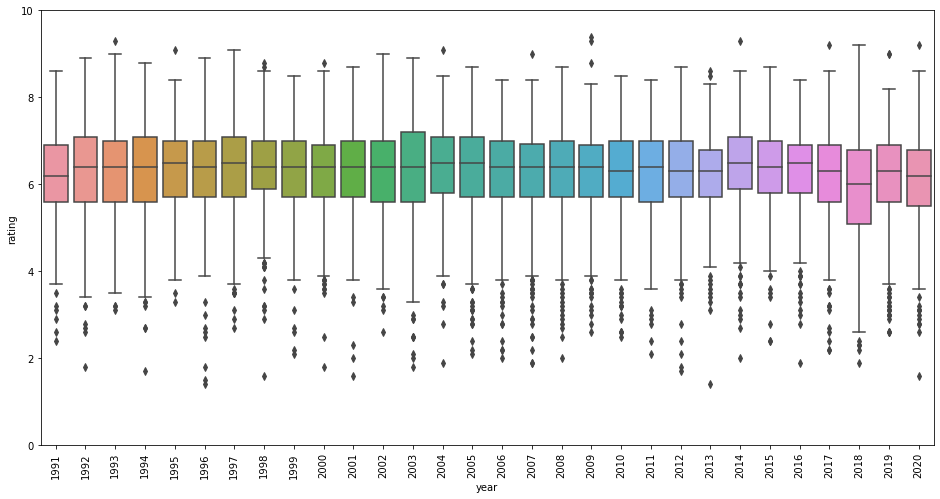

In [19]:
var_year = 'year'
data = pd.concat([df['rating'], df[var_year]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var_year, y="rating", data=data)
fig.axis(ymin=0, ymax=10);
plt.xticks(rotation=90);

In [20]:
dr_list = ['name', 'year', 'director']
df = df.drop(dr_list, axis=1)
df.head(5)

,rating,m_score,vote,gross,act,advent,anima,biogr,come,crime,docum,dram,fami,fant,film_nor,game_sh,hist,horr,mus,musc,myst,news,real_tv,rom,sci_f,spo,talksh,thrill,war,west,non_t
0,8.6,85.0,1294962.0,130742922.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8.5,75.0,1008750.0,204843350.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8.0,95.0,421130.0,218967620.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.8,52.0,238177.0,119654823.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.9,51.0,180551.0,165500000.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df.describe()

,rating,m_score,vote,gross,act,advent,anima,biogr,come,crime,docum,dram,fami,fant,film_nor,game_sh,hist,horr,mus,musc,myst,news,real_tv,rom,sci_f,spo,talksh,thrill,war,west,non_t
count,12161.000000,8274.000000,1.101600e+04,1.101600e+04,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.0,12161.000000,12161.000000,12161.000000,12161.0,12161.0,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.000000,12161.0,12161.000000,12161.000000,12161.000000,12161.0,12161.00000,12161.000000,12161.000000,12161.000000
mean,6.257109,55.649746,5.677488e+04,2.226705e+07,0.175315,0.120220,0.040375,0.058712,0.373242,0.154757,0.0,0.628238,0.053450,0.057232,0.0,0.0,0.031330,0.073925,0.032645,0.012499,0.069978,0.000164,0.0,0.202039,0.043335,0.019489,0.0,0.12869,0.018995,0.006003,0.004194
std,1.067379,17.225767,1.356972e+05,5.375533e+07,0.380252,0.325232,0.196845,0.235095,0.483686,0.361688,0.0,0.483295,0.224937,0.232295,0.0,0.0,0.174214,0.261659,0.177714,0.111102,0.255120,0.012824,0.0,0.401538,0.203619,0.138240,0.0,0.33487,0.136513,0.077248,0.064626
min,1.400000,1.000000,5.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
25%,5.700000,43.000000,2.098750e+03,8.237875e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
50%,6.400000,56.000000,1.006300e+04,1.134484e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
75%,7.000000,68.000000,4.938925e+04,2.020738e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
max,9.400000,100.000000,2.385759e+06,9.366622e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000


In [22]:
genres_cols = dict()
for col in df.columns[4:].values:
  genres_cols[col] = df[col].values.sum()

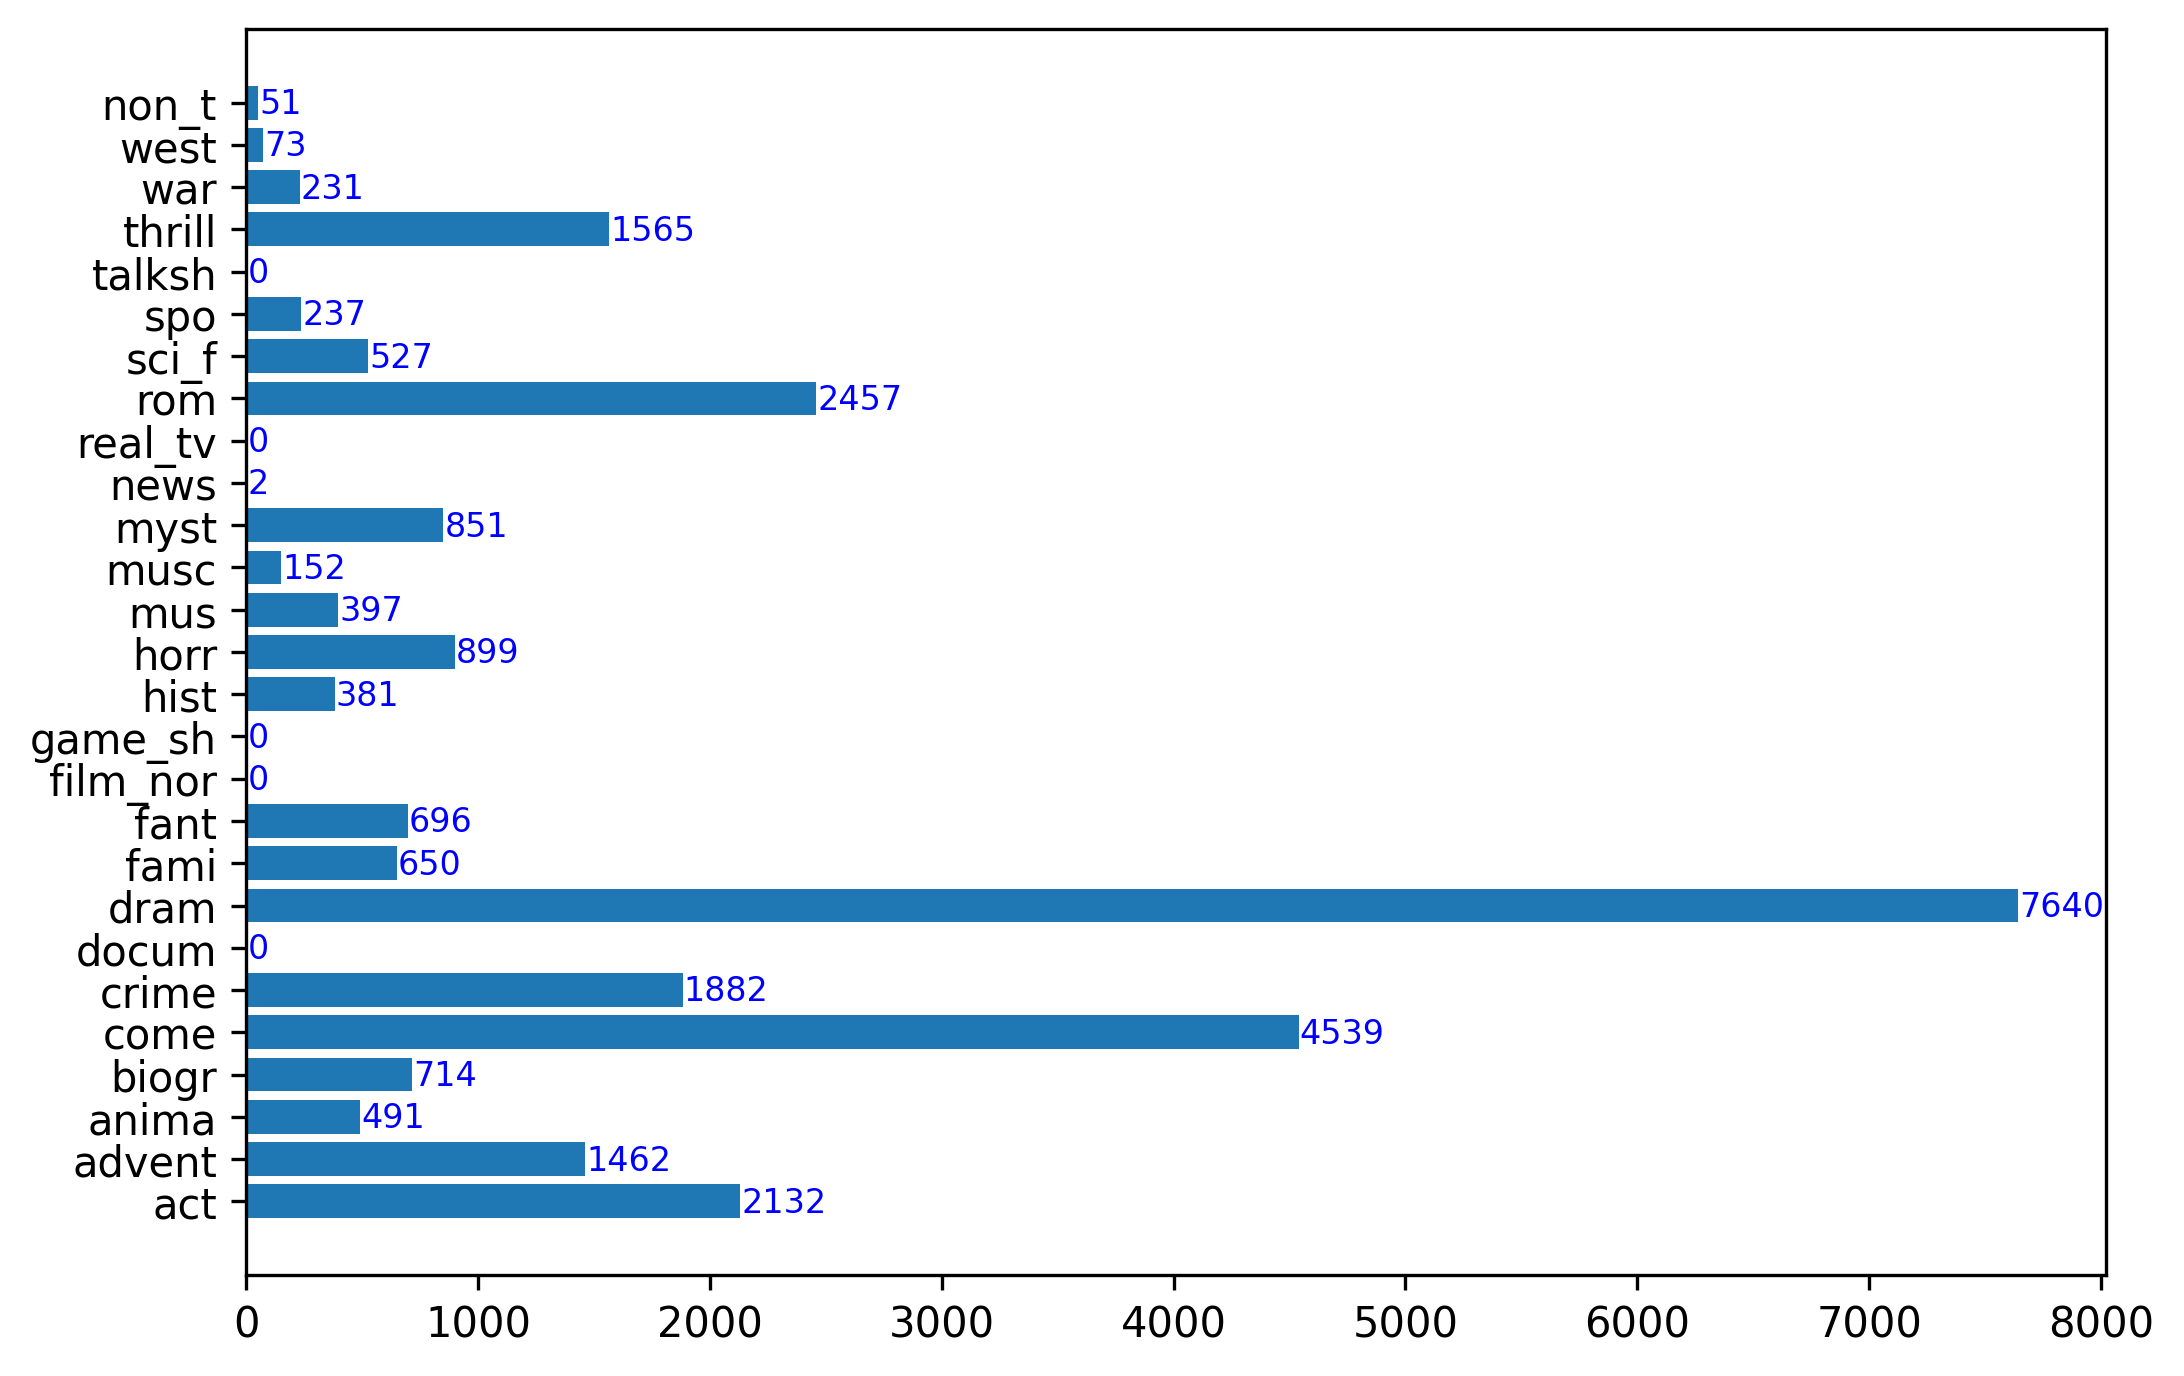

In [23]:
fig, ax = plt.subplots(figsize = (8,5.5), dpi=300)

plt.barh(*zip(*genres_cols.items()))
for i, v in enumerate(genres_cols):
    ax.text(genres_cols[v]+5, i-0.25, str(genres_cols[v]), color='blue',fontsize=8)

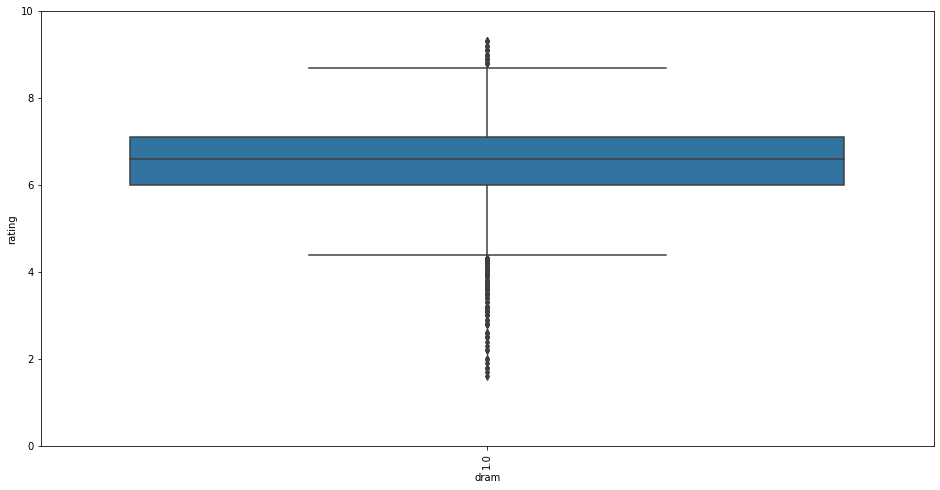

In [24]:
var_dram = 'dram'
data = pd.concat([df['rating'], df[var_dram].where(df[var_dram] > 0)], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var_dram, y="rating", data=data)
fig.axis(ymin=0, ymax=10);
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

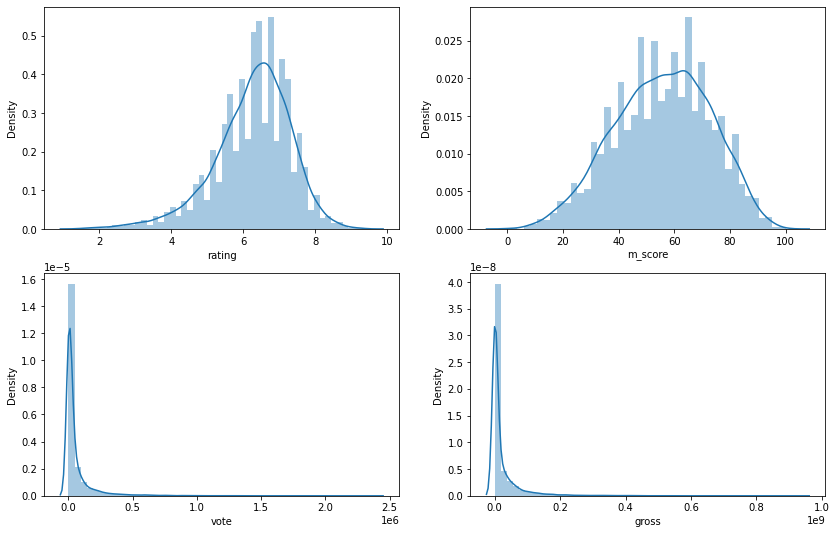

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(14, 9))
sns.distplot(df['rating'],ax = axs[0,0]);
sns.distplot(df['m_score'], ax = axs[0, 1]);
sns.distplot(df['vote'], ax= axs[1,0] );
sns.distplot( df['gross'], ax=axs[1,1]);


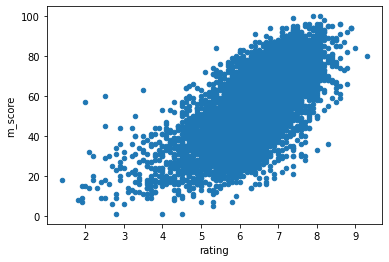

In [26]:
#scatter plot m_score/rating

var_m_score = 'm_score'
data = pd.concat([df['rating'], df[var_m_score]], axis=1)
data.plot.scatter(x='rating', y=var_m_score);

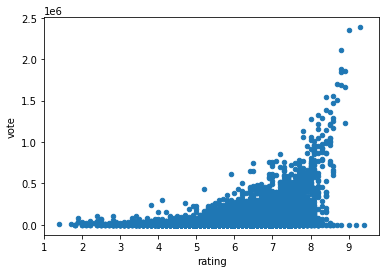

In [27]:
#scatter plot vote/rating

var_vote = 'vote'
data = pd.concat([df[var_vote],df['rating']], axis=1)
data.plot.scatter(x='rating', y=var_vote);

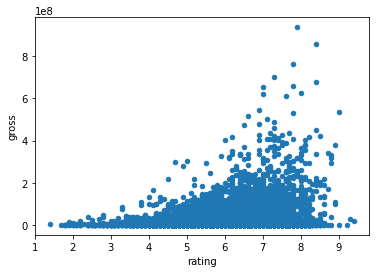

In [28]:
#scatter plot gross/rating

var_gross = 'gross'
data = pd.concat([df['rating'], df[var_gross]], axis=1)
data.plot.scatter(x='rating', y=var_gross);

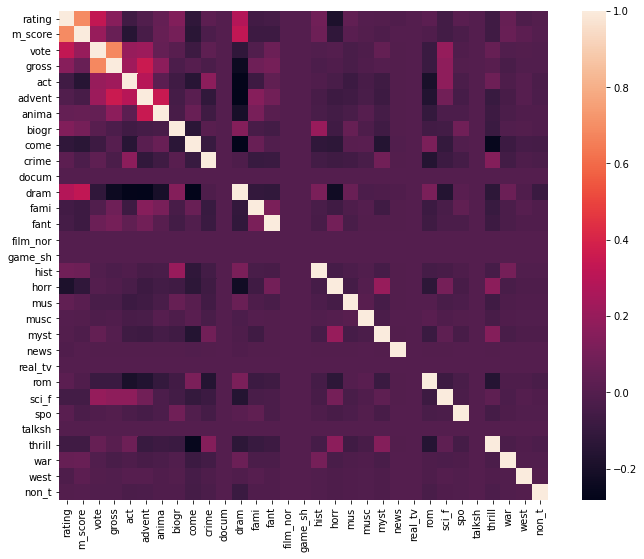

In [29]:
#correlation matrix

corrmat = df.corr()
corrmat = corrmat.fillna(0)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

# **Features Selection**

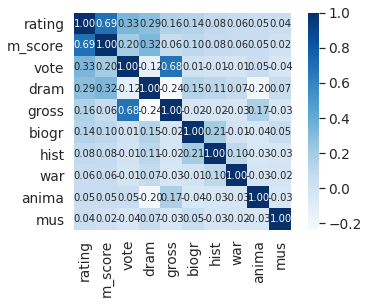

In [30]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'rating')['rating'].index
cm = df[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


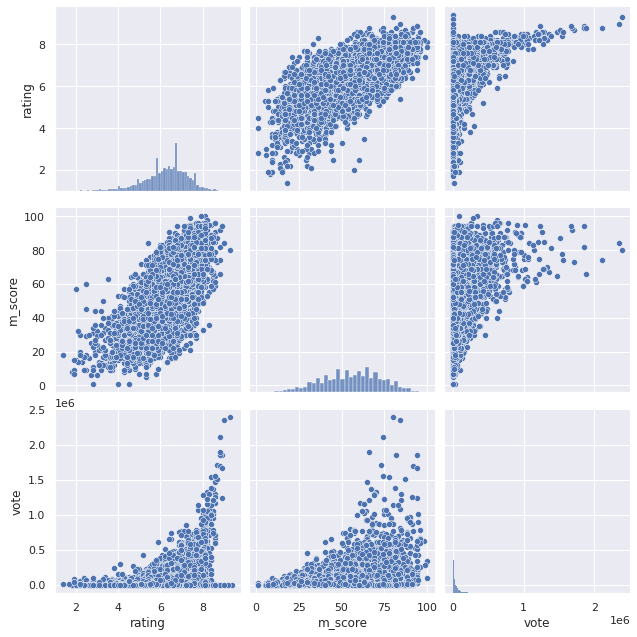

In [31]:
#scatterplot

sns.set()
cols = ['rating', 'm_score', 'vote'] 
sns.pairplot(df[cols], size = 3)
plt.show();

In [32]:
df_cols_selected = df.loc[:, cols]
df_cols_selected.head(5)

,rating,m_score,vote
0,8.6,85.0,1294962.0
1,8.5,75.0,1008750.0
2,8.0,95.0,421130.0
3,6.8,52.0,238177.0
4,6.9,51.0,180551.0


In [33]:
df_cols_selected.describe()

,rating,m_score,vote
count,12161.000000,8274.000000,1.101600e+04
mean,6.257109,55.649746,5.677488e+04
std,1.067379,17.225767,1.356972e+05
min,1.400000,1.000000,5.000000e+00
25%,5.700000,43.000000,2.098750e+03
50%,6.400000,56.000000,1.006300e+04
75%,7.000000,68.000000,4.938925e+04
max,9.400000,100.000000,2.385759e+06


# **Missing Values Handling**

In [34]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
m_score,3887,32.0
vote,1145,9.4
gross,1145,9.4


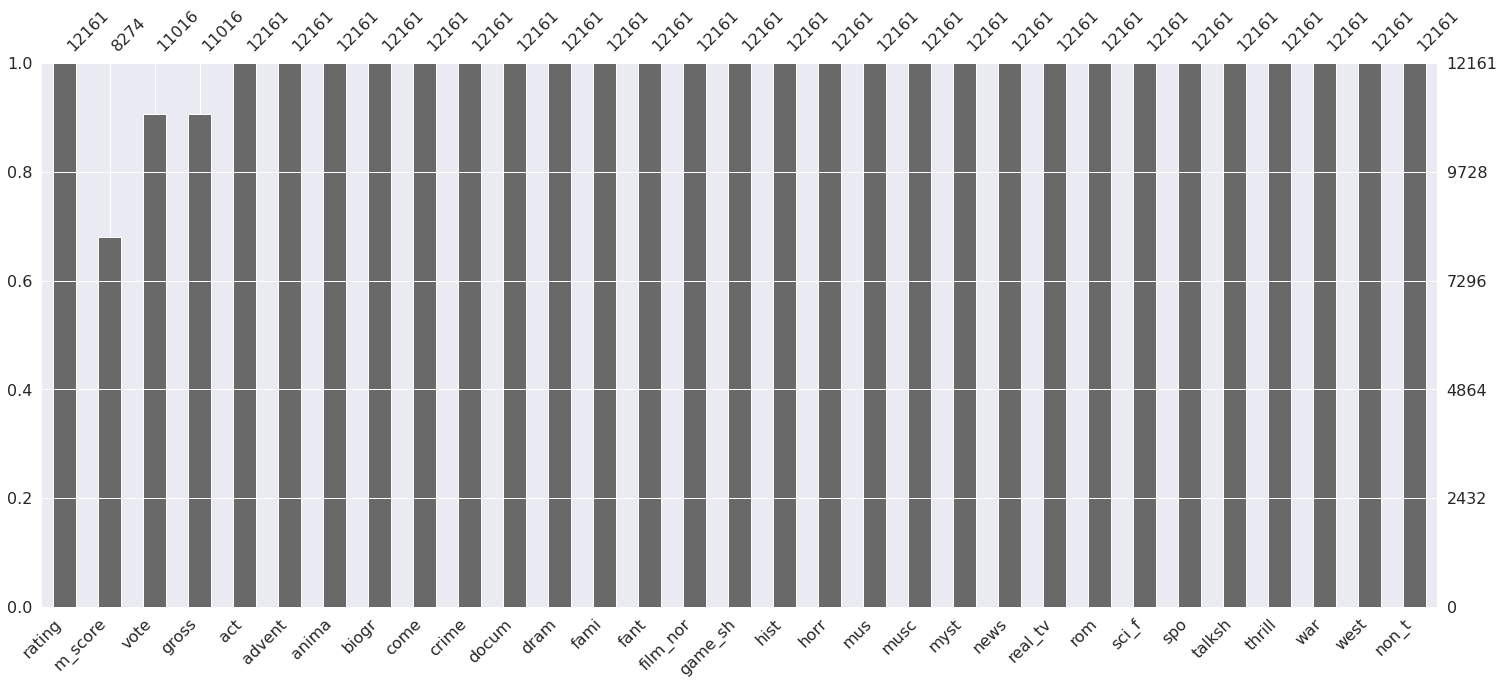

In [35]:
msno.bar(df)

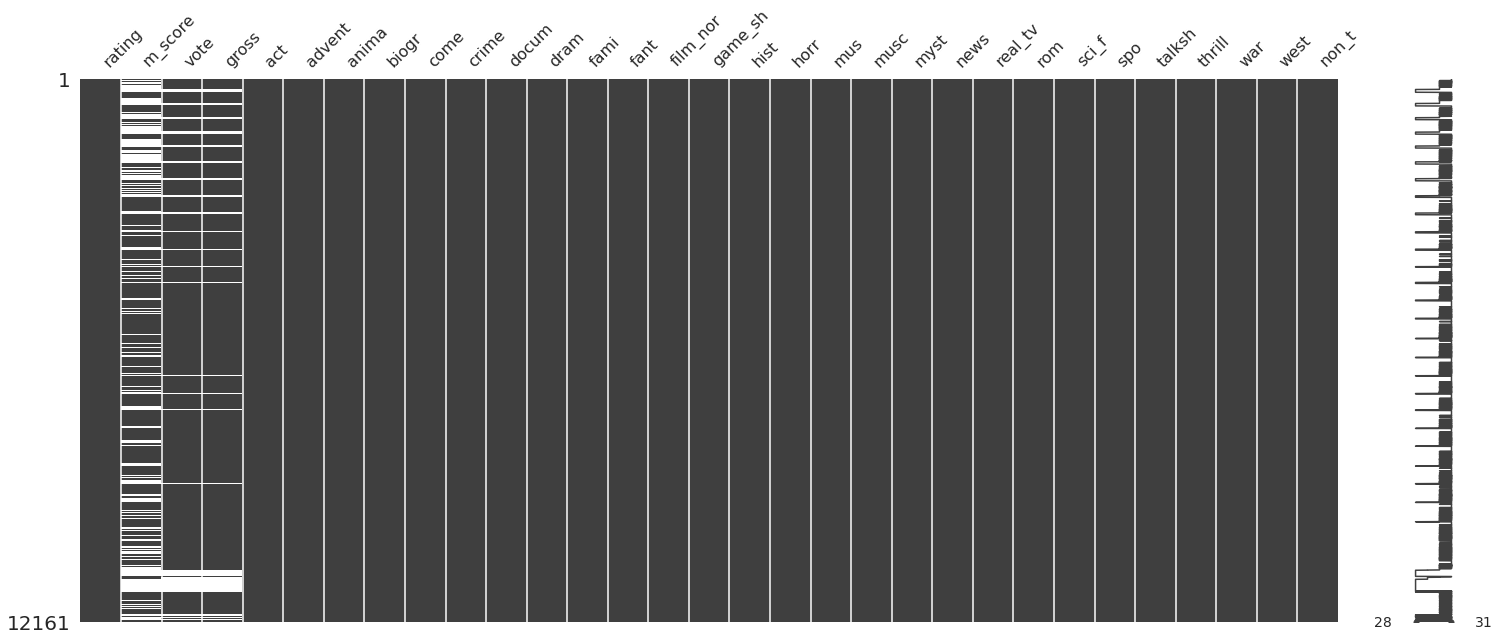

In [36]:
msno.matrix(df)

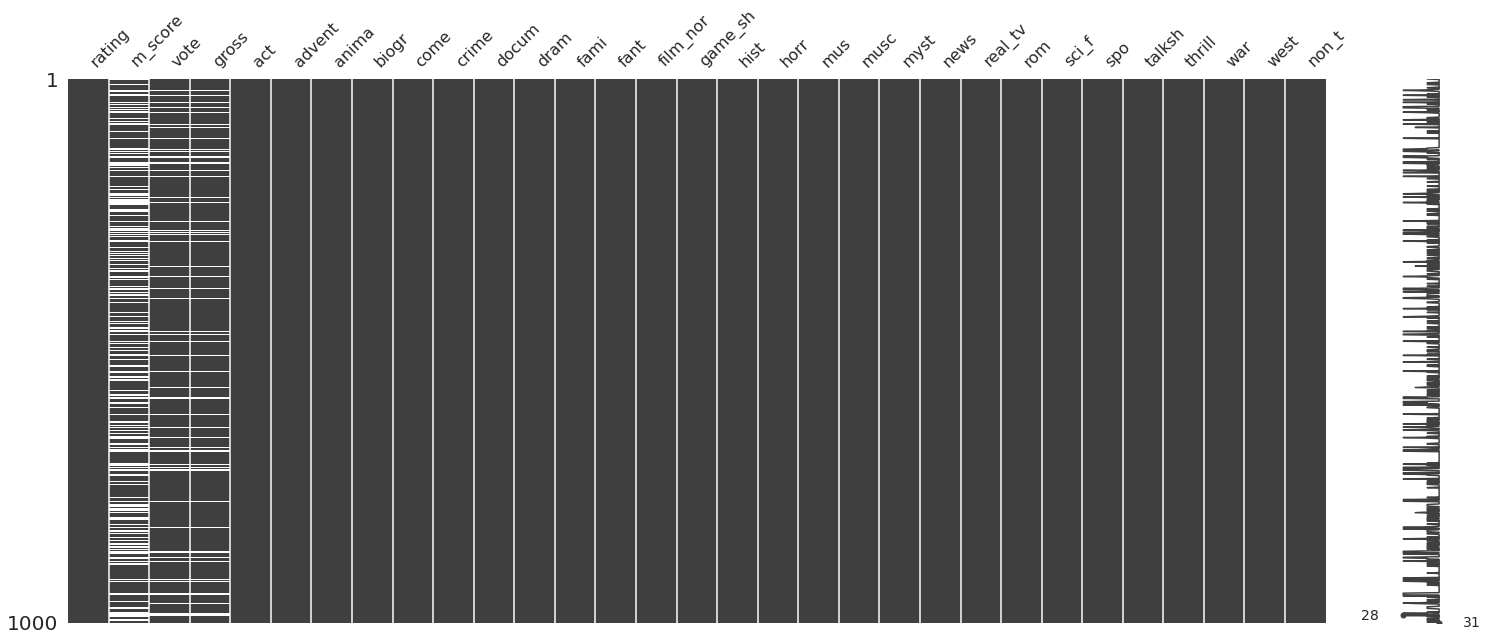

In [37]:
msno.matrix(df.sample(1000))

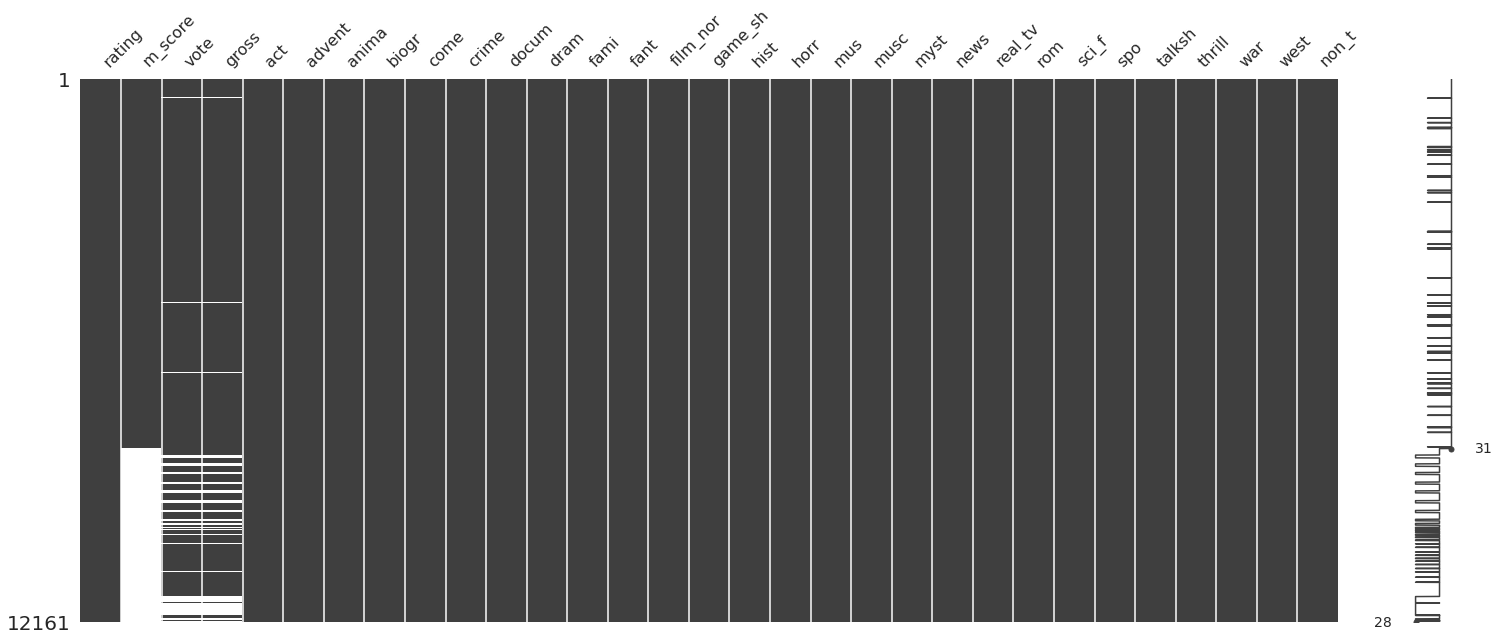

In [38]:
sorted = df.sort_values('m_score')
msno.matrix(sorted)

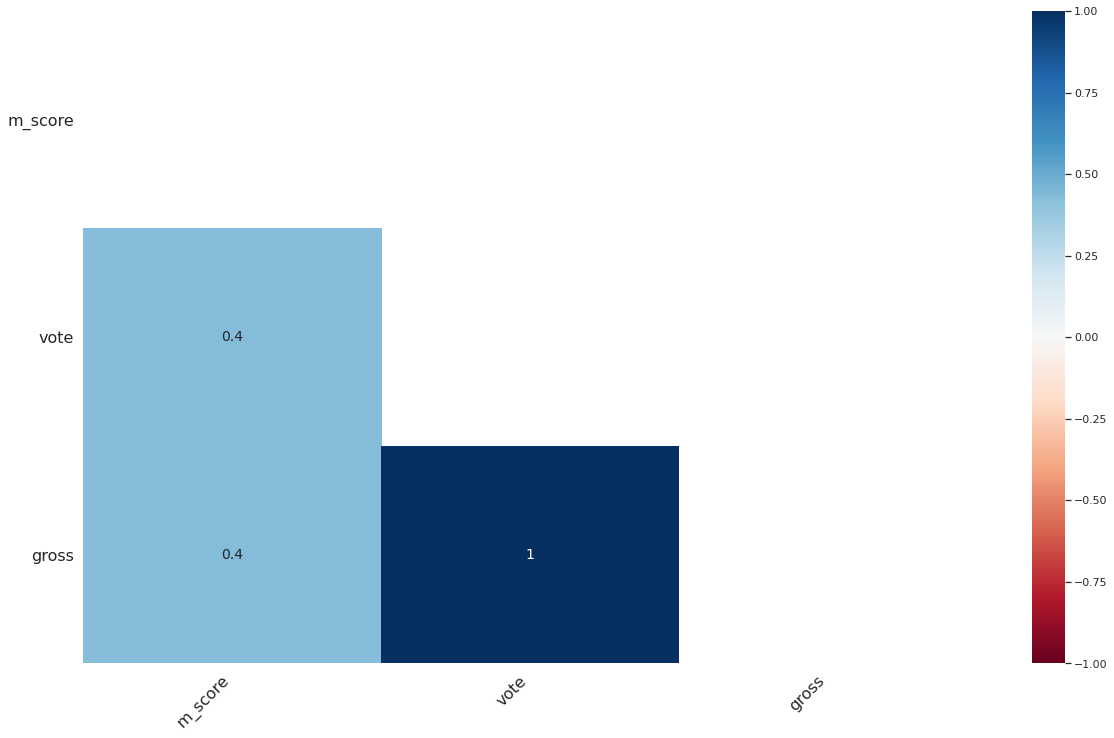

In [39]:
msno.heatmap(df)

In [40]:
df = df.dropna()
df.isnull().sum()


rating      0
m_score     0
vote        0
gross       0
act         0
advent      0
anima       0
biogr       0
come        0
crime       0
docum       0
dram        0
fami        0
fant        0
film_nor    0
game_sh     0
hist        0
horr        0
mus         0
musc        0
myst        0
news        0
real_tv     0
rom         0
sci_f       0
spo         0
talksh      0
thrill      0
war         0
west        0
non_t       0
dtype: int64

In [41]:
df_train = pd.DataFrame(df,columns=['rating','m_score','vote'])
df_train.tail(10)

,rating,m_score,vote
12137,6.3,60.0,2318.0
12138,6.8,55.0,121063.0
12142,6.7,63.0,37027.0
12145,5.5,39.0,10282.0
12149,7.3,62.0,436818.0
12152,6.7,81.0,74044.0
12153,6.6,82.0,294.0
12156,7.0,77.0,143314.0
12158,6.5,42.0,21938.0
12159,4.7,40.0,1807.0


# **Data Normalization**

In [42]:
df_train['vote']= np.log(df_train['vote'])
df_train

,rating,m_score,vote
0,8.6,85.0,14.073992
1,8.5,75.0,13.824222
2,8.0,95.0,12.950697
3,6.8,52.0,12.380769
4,6.9,51.0,12.103769
...,...,...,...
12152,6.7,81.0,11.212415
12153,6.6,82.0,5.683580
12156,7.0,77.0,11.872793
12158,6.5,42.0,9.995976


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


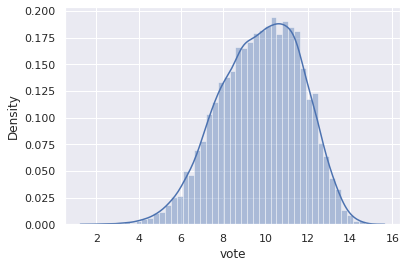

In [43]:
sns.distplot(df_train['vote']);

In [44]:
min_max = MinMaxScaler() 
df_train = pd.DataFrame(min_max.fit_transform(df_train),columns=df_train.columns) 
df_train.head()

,rating,m_score,vote
0,0.911392,0.848485,0.951069
1,0.898734,0.747475,0.931068
2,0.835443,0.949495,0.861118
3,0.683544,0.515152,0.815479
4,0.696203,0.505051,0.793298


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


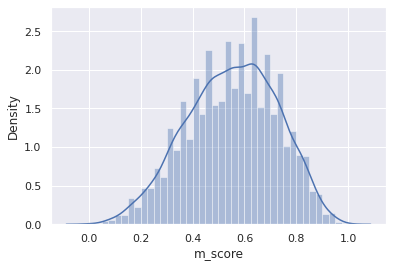

In [45]:
sns.distplot(df_train['m_score']);

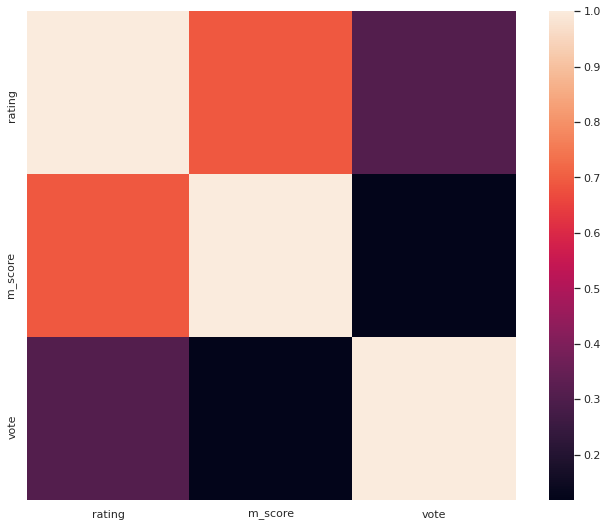

In [46]:
#correlation matrix

corrmat = df_train.corr()
corrmat = corrmat.fillna(0)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

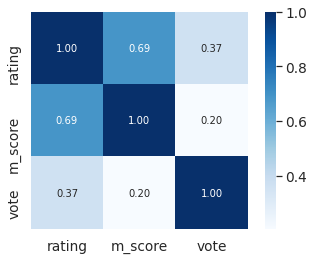

In [47]:
k = 3 #number of variables for heatmap
cols = corrmat.nlargest(k, 'rating')['rating'].index
cm = df[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

In [48]:
df_train.isnull().sum()

rating     0
m_score    0
vote       0
dtype: int64

# **Out liar Handling**

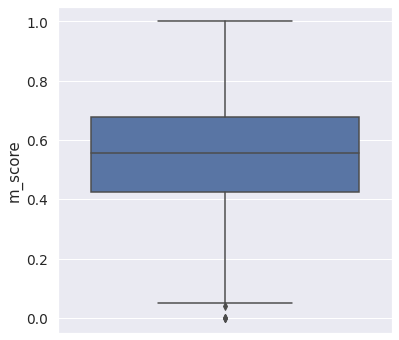

In [49]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y = df_train['m_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


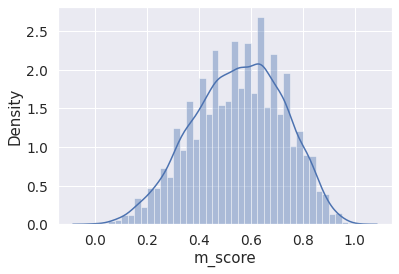

In [50]:
sns.distplot(df_train['m_score']);

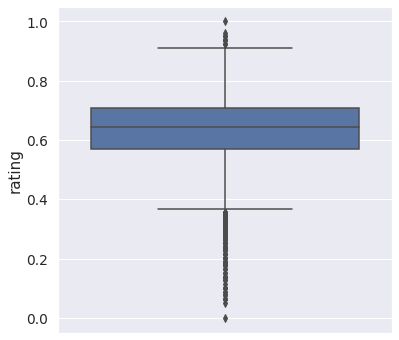

In [51]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y = df_train['rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


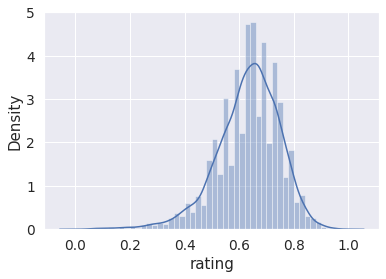

In [52]:
sns.distplot(df_train['rating']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


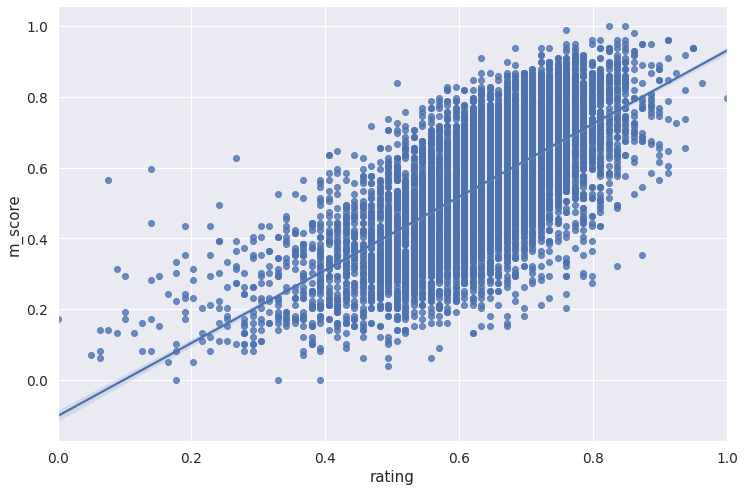

In [53]:
fig = plt.figure(figsize=(12,8))
sns.regplot(df_train['rating'],df_train['m_score'])

In [54]:
df_rating_02_04 = df_train.loc[(df_train['rating'] >= 0.0) & (df_train['rating'] <= 0.3)]
df_mscr_05_07 = df_rating_02_04.loc[(df_rating_02_04['m_score'] >= 0.55) & (df_rating_02_04['m_score'] <= 0.7)]
df_train = df_train.drop(df_mscr_05_07.index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


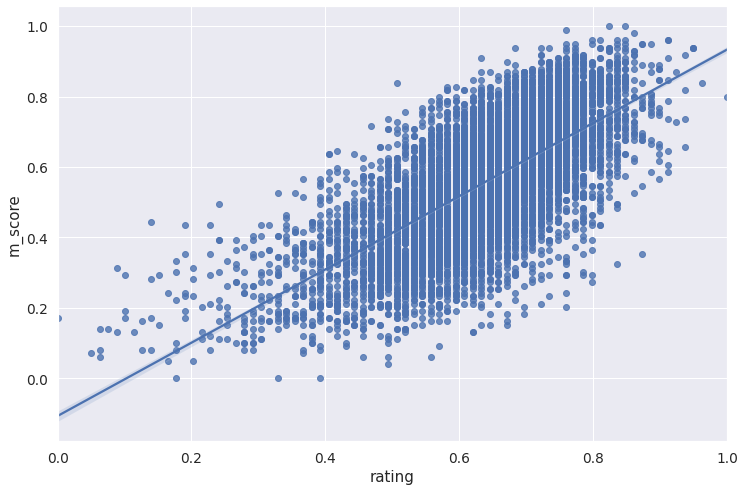

In [55]:
fig = plt.figure(figsize=(12,8))
sns.regplot(df_train['rating'],df_train['m_score'])

# **Data Modeling**

In [ ]:
X0 = np.array([df_train['m_score'].values])
X1 = np.array([df_train['vote'].values])
X = np.concatenate((X0.T,X1.T, np.ones((X0.shape[1], 1))), axis=1)
#,np.ones((X0.shape[1], 1)))
y = np.array(df_train['rating'])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=50)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.08, random_state=50)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6045, 3)
(1643, 3)
(526, 3)


**Linear Regression**

In [59]:
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [60]:
y_pred = regr.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.07744643568015827

In [62]:
x = np.arange(0, y_test.shape[0])

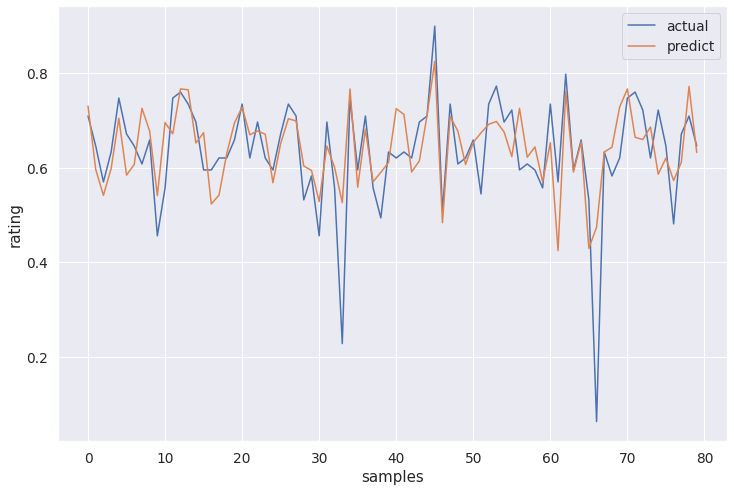

In [63]:
fig = plt.figure(figsize=(12,8))
start = 0
end = 80
plt.plot(x[start:end], (y_test[start:end]))
plt.plot(x[start:end], (y_pred[start:end]))
plt.legend(['actual', 'predict'], loc='upper right')
plt.xlabel('samples')
plt.ylabel('rating')
plt.show()

In [64]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.07744643568015827

In [65]:
mean_squared_error(y_test, y_pred)

0.0059979503995608915

In [66]:
metrics.r2_score(y_test, y_pred)

0.5393099588876914

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


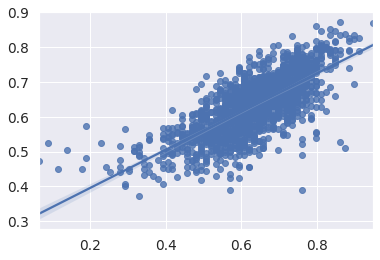

In [67]:
sns.regplot(y_test, y_pred)

**USING NEUTRAL NETWORK**

In [77]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
import keras

In [78]:
model = Sequential([
        Dense(32, activation = 'relu'),  #32 neurons, Input Layer, 'relu' activation
        Dense(32, activation = 'relu'),  #32 neurons, Hidden Layer, 'relu' activation
        Dense(32, activation = 'relu'),  #32  neurons, Hidden Layer, 'relu' activation
        Dense(1)                         #Output Layer
    ])                                                      
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
        loss='mse',  #Trained using Mean square error loss (Cost function) 
        optimizer=optimizer  #Optimizer used is 'adam' (One of the Fastest optimizers)
    )

In [79]:

filepath="/content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/Model Check Point/weights-{epoch:02d}-{val_loss:.5f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size=32,
    epochs = 100, callbacks=callbacks_list)



Epoch 1/100
189/189 [==============================] - 2s 3ms/step - loss: 0.0182 - val_loss: 0.0064

Epoch 00001: val_loss improved from inf to 0.00642, saving model to /content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/Model Check Point/weights-01-0.00642.hdf5
Epoch 2/100
189/189 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0060

Epoch 00002: val_loss improved from 0.00642 to 0.00599, saving model to /content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/Model Check Point/weights-02-0.00599.hdf5
Epoch 3/100
189/189 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0060

Epoch 00003: val_loss improved from 0.00599 to 0.00596, saving model to /content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/Model Check Point/weights-03-0.00596.hdf5
Epoch 4/100
189/189 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0061

Epoch 00004: val_loss did not

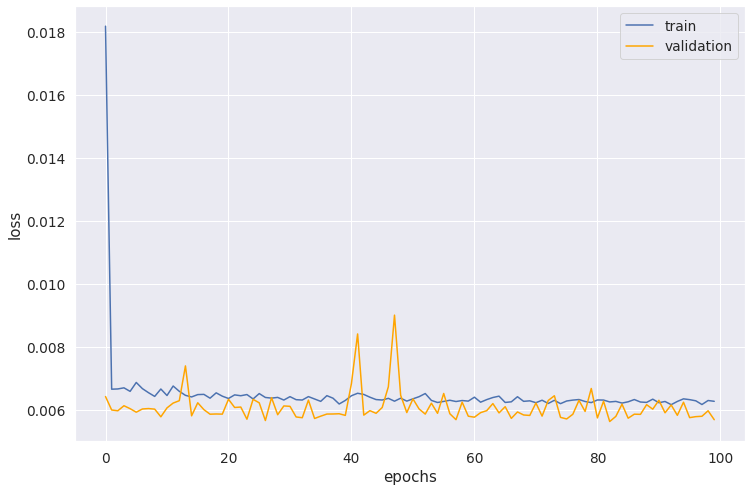

In [103]:
fig = plt.figure(figsize=(12,8))
df_his = pd.DataFrame(history.history) 
plt.plot(df_his.loc[0:100,['loss']]) # training error
plt.plot(df_his.loc[0:100,['val_loss']], color='orange') # validation error
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')


In [89]:
model.load_weights('/content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/Model Check Point/weights-63-0.00567.hdf5')

In [90]:
y_nn_pred = model.predict(X_test)

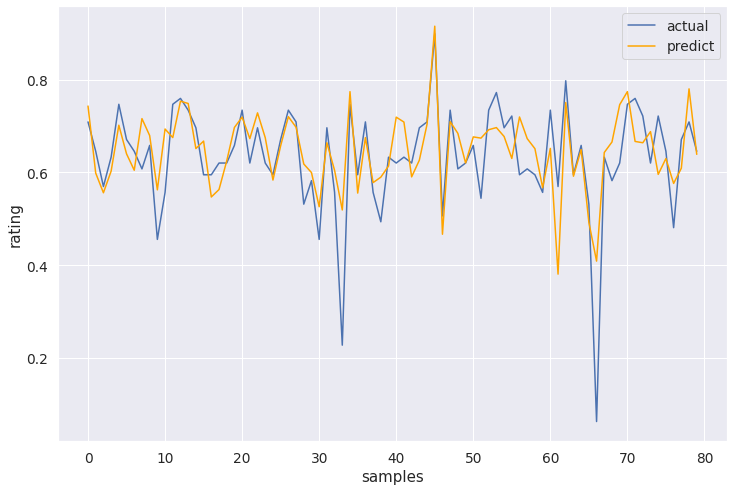

In [100]:
fig = plt.figure(figsize=(12,8))
start = 0
end = 80
plt.plot(x[start:end], (y_test[start:end]))
plt.plot(x[start:end], (y_nn_pred[start:end]), color='orange')
plt.legend(['actual', 'predict'], loc='upper right')
plt.xlabel('samples')
plt.ylabel('rating')
plt.show()

In [92]:
np.sqrt(metrics.mean_squared_error(y_test, y_nn_pred))

0.07538226915739585

In [93]:
mean_squared_error(y_test, y_nn_pred)

0.0056824865033180735

In [94]:
metrics.r2_score(y_test, y_nn_pred)

0.5635400817877061

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


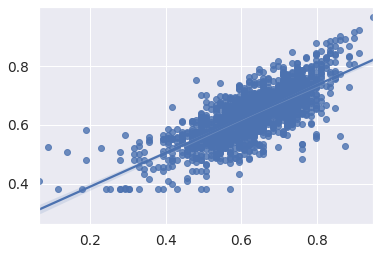

In [95]:
sns.regplot(y_test, y_nn_pred)

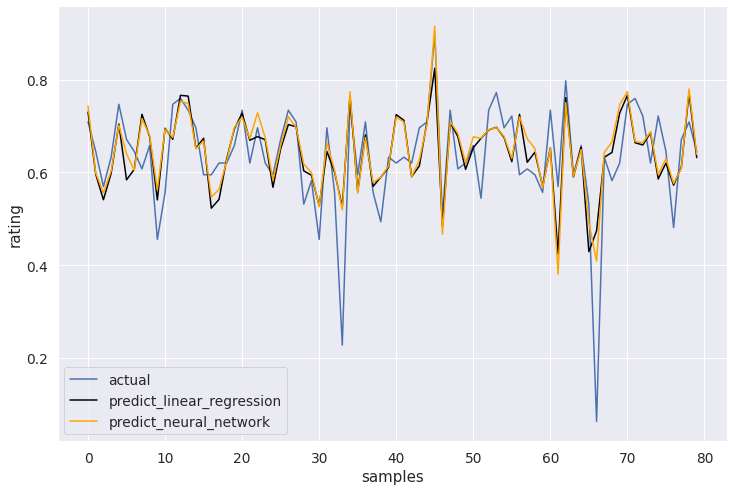

In [101]:
fig = plt.figure(figsize=(12,8))
start = 0
end = 80
plt.plot(x[start:end], (y_test[start:end]))
plt.plot(x[start:end], (y_pred[start:end]), color='black')
plt.plot(x[start:end], (y_nn_pred[start:end]), color='orange')
plt.legend(['actual', 'predict_linear_regression', 'predict_neural_network'], loc='lower left')
plt.xlabel('samples')
plt.ylabel('rating')
plt.show()

# **Test**

In [144]:
m_score = np.random.rand(1)
vote = np.random.rand(1)
input = np.concatenate((m_score, vote, np.array([1])))
input = np.array([input])

In [145]:
# linear regression 
ln_output = regr.predict(input)
ln_output[0]

0.7303759587371961

In [ ]:
# neural network
my_model = tf.keras.models.load_model('/content/drive/MyDrive/Tiểu luận khoa học dữ liệu /Implementation/Model Check Point/weights-63-0.00567.hdf5')

In [146]:
nn_ouput = my_model.predict(input)
nn_ouput[0][0]

0.86318207